In [1]:
import pandas as pd
import os
import re
import numpy as np

In [171]:
great = pd.read_csv("../options_for_fig3/promoter_distal/GREATpicks_distal_elements_by_cluster.csv",header=None)

In [172]:
great

,0
0,MP:0002085
1,MP:0002080
2,MP:0008762
3,MP:0010770
4,MP:0000428
...,...
78,MP:0013224
79,MP:0013225
80,HP:0009795
81,HP:0009796


In [173]:
len(set(great[0]))

67

In [174]:
len((great[0]))

83

- 63 unique terms

In [175]:
great_terms = []
for entry in great[0]:
    if entry in great_terms:
        continue
    else:
        great_terms.append(entry)

In [176]:
len(great_terms)

67

In [177]:
set([entry.split(':')[0] for entry in great_terms])

{'GO', 'HP', 'MP'}

- read all csvs

In [178]:
base_dir = "/Users/LoboM/Dropbox/sharedUMass_Macrina_Rene/pharynx_figures_JUN25/notebooks/distal_beds/"

In [179]:
term_types = ['Human_Phenotype','Mouse_Phenotype_Single_KO','Mouse_Phenotype',
              'GO_Cellular_Component','GO_Biological_Process','GO_Molecular_Function']

In [180]:
index_tmp  = ["C18","C19","C21","C22","C13","C12","C10","C9","C11","C14","C15","C8","C3","C4","C5","C6","C7","C1","C2","C16","C17"]

In [181]:
numclus = 21
term_mat = pd.DataFrame(np.zeros((numclus,len(great_terms))),index=index_tmp,columns=great_terms)



In [182]:
term_mat

,MP:0002085,MP:0002080,MP:0008762,MP:0010770,MP:0000428,MP:0005382,MP:0003816,MP:0003817,MP:0002132,MP:0002163,...,MP:0006387,MP:0002401,MP:0002145,MP:0002722,MP:0006031,MP:0013222,MP:0013224,MP:0013225,HP:0009795,HP:0009796
C18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
numclus = 21
term_mat_binom = pd.DataFrame(np.zeros((numclus,len(great_terms))),index=index_tmp,columns=great_terms)
term_mat_hyper = pd.DataFrame(np.zeros((numclus,len(great_terms))),index=index_tmp,columns=great_terms)

id_name = {}

for clus in ['C' + str(entry) for entry in range(1,23)]:
    if clus == 'C20':
        continue
    for term in term_types:
        path = base_dir +  str(clus) + '_' + re.escape(term) + '.csv'
        # path = path.replace(' ', '\ ')
        tmp_info = pd.read_csv(path,index_col=0)
        index_colname = term.replace('_','.')
        tmp_info_trunc = tmp_info.loc[tmp_info[index_colname + '.ID'].isin(great_terms),[index_colname + '.ID',index_colname + '.name',index_colname + '.Binom_Adjp_BH',index_colname + '.Hyper_Adjp_BH']]
        tmp_info_trunc['logp_binom'] = -np.log10(tmp_info_trunc[index_colname + '.Binom_Adjp_BH'])
        tmp_info_trunc['logp_hyper'] = -np.log10(tmp_info_trunc[index_colname + '.Hyper_Adjp_BH'])
        
        # add to term_mat
        for found_term in tmp_info_trunc[index_colname + '.ID']:
            
            if  found_term not in id_name:
                id_name[found_term]  =  found_term + '|' + list(tmp_info_trunc.loc[tmp_info_trunc[index_colname + '.ID']==found_term,index_colname + '.name'])[0]
            
            term_mat_binom.loc[clus,found_term] = list(tmp_info_trunc.loc[tmp_info_trunc[index_colname + '.ID']==found_term,'logp_binom'])[0]
            term_mat_hyper.loc[clus,found_term] = list(tmp_info_trunc.loc[tmp_info_trunc[index_colname + '.ID']==found_term,'logp_hyper'])[0]

# change colnames
term_mat_binom.rename(columns=id_name, inplace=True)
term_mat_hyper.rename(columns=id_name, inplace=True)

In [184]:
term_mat_hyper

,MP:0002085|abnormal embryonic tissue morphology,MP:0002080|prenatal lethality,MP:0008762|embryonic lethality,MP:0010770|preweaning lethality,MP:0000428|abnormal craniofacial morphology,MP:0005382|craniofacial phenotype,MP:0003816|abnormal pituitary gland development,MP:0003817|abnormal pituitary diverticulum morphology,MP:0002132|abnormal respiratory system morphology,MP:0002163|abnormal gland morphology,...,MP:0006387|abnormal T cell number,MP:0002401|abnormal lymphopoiesis,MP:0002145|abnormal T cell differentiation,MP:0002722|abnormal immune system organ morphology,MP:0006031|abnormal pharyngeal pouch morphology,MP:0013222|abnormal first pharyngeal pouch morphology,MP:0013224|absent second pharyngeal pouch,MP:0013225|abnormal third pharyngeal pouch morphology,HP:0009795|Branchial fistula,HP:0009796|Branchial cyst
C18,19.152167,21.543512,11.799208,51.930742,33.272999,33.180728,1.268199,0.661310,18.037824,25.277908,...,5.851210,4.470606,2.327255,10.810516,1.224873,0.377864,0.215382,0.493490,0.367649,0.367649
C19,6.860559,6.118087,3.220483,16.276294,8.247103,8.423902,0.550664,0.443866,6.316290,8.718076,...,3.969859,1.046861,1.215413,4.037440,0.772949,0.585839,0.422820,0.328373,0.601627,0.601627
C21,21.281191,16.071870,9.366710,39.303186,33.681839,33.709348,1.397564,1.936921,18.435683,17.232464,...,2.671861,3.706219,1.889088,8.737454,2.746124,0.503893,1.095977,0.776142,0.527020,0.527020
C22,14.034059,16.588301,9.262358,35.537596,26.122773,25.953446,1.375192,1.774090,13.806186,16.697312,...,1.689334,1.572814,0.706994,8.869061,2.076285,0.607166,1.361771,1.025130,0.887835,0.887835
C13,8.734889,8.027607,5.020824,17.532024,17.065329,16.985699,0.153340,0.015503,9.534494,9.882927,...,1.476203,1.527187,1.341005,3.576283,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
C12,20.422786,21.924280,15.000692,44.538159,30.726510,30.444398,0.448406,0.485116,18.595153,22.253606,...,3.511422,3.637453,2.805967,10.610807,0.930866,-0.000000,0.294797,0.205073,-0.000000,-0.000000
C10,9.185526,10.482866,9.479719,21.144602,15.338155,15.285925,0.631819,0.566489,13.180166,8.063057,...,1.020834,0.624918,1.084820,1.581100,0.668723,0.566489,0.391861,0.298487,0.093386,0.093386
C9,1.652610,0.469238,0.428414,2.196989,3.524235,3.524235,1.507603,1.717039,1.565035,0.960675,...,0.106340,0.364628,0.469238,0.745956,0.052135,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
C11,5.358291,7.520279,6.329050,16.360615,12.363935,12.293014,1.458960,1.248505,5.272241,7.903009,...,0.631886,0.849538,0.713109,2.259658,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
C14,1.815089,3.230518,1.716024,3.483398,5.757142,5.757142,0.897177,1.048941,4.428014,0.184643,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


In [185]:
term_mat_binom

,MP:0002085|abnormal embryonic tissue morphology,MP:0002080|prenatal lethality,MP:0008762|embryonic lethality,MP:0010770|preweaning lethality,MP:0000428|abnormal craniofacial morphology,MP:0005382|craniofacial phenotype,MP:0003816|abnormal pituitary gland development,MP:0003817|abnormal pituitary diverticulum morphology,MP:0002132|abnormal respiratory system morphology,MP:0002163|abnormal gland morphology,...,MP:0006387|abnormal T cell number,MP:0002401|abnormal lymphopoiesis,MP:0002145|abnormal T cell differentiation,MP:0002722|abnormal immune system organ morphology,MP:0006031|abnormal pharyngeal pouch morphology,MP:0013222|abnormal first pharyngeal pouch morphology,MP:0013224|absent second pharyngeal pouch,MP:0013225|abnormal third pharyngeal pouch morphology,HP:0009795|Branchial fistula,HP:0009796|Branchial cyst
C18,39.934058,52.072891,45.085087,75.693883,45.571207,45.571207,2.697477,3.630431,39.515259,47.624367,...,31.316551,24.582438,23.662158,31.510518,1.058977,0.421190,0.486501,2.692066,1.939499,1.939499
C19,2.632989,4.616674,2.556832,8.535300,1.874332,1.977558,-0.000000,-0.000000,2.902829,5.142771,...,4.822072,1.876226,1.889319,3.798593,0.560270,0.089414,0.353297,0.298438,0.055277,0.055277
C21,35.442132,28.462714,26.566283,54.332707,44.338127,44.421474,1.742408,2.962502,28.777145,37.186371,...,10.795626,12.325976,10.448618,21.754911,5.139495,4.614483,2.612508,2.238801,13.260924,13.260924
C22,17.140028,19.363269,14.380122,36.410480,18.794532,18.772146,0.382515,0.720317,13.196541,19.479136,...,3.572266,1.910628,0.872730,10.618093,3.838908,0.036292,9.329633,8.517034,0.371562,0.371562
C13,6.986133,9.746899,6.783055,17.275596,12.372041,12.372041,-0.000000,-0.000000,7.259989,7.945217,...,0.727924,1.511578,0.534404,4.061592,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
C12,30.426414,34.697811,30.968308,50.996565,35.699149,35.611281,7.234144,9.566463,26.005159,38.583497,...,9.502676,7.056761,5.597596,24.399052,1.650497,-0.000000,0.881082,0.719495,-0.000000,-0.000000
C10,5.221214,13.152570,11.760454,14.637699,5.061558,5.043262,0.366758,0.461392,11.637396,6.117363,...,1.238660,0.723706,0.894549,1.613858,0.184725,0.054698,0.345773,0.287755,-0.000000,-0.000000
C9,1.009851,0.317359,0.491419,1.432792,1.562813,1.560557,2.467151,2.788926,0.504219,0.769899,...,0.033365,0.026309,0.214213,0.566080,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
C11,4.086948,9.629248,8.038858,11.421000,5.082247,5.069603,3.572865,3.857325,4.092977,5.485421,...,0.939569,1.549971,1.422693,2.245552,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
C14,0.966220,3.868711,2.856606,2.195702,3.477690,3.477690,1.696887,1.985792,2.619068,0.045259,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


- order columns 

In [186]:
# custom_order = list(string.ascii_uppercase)[0:numclus]
# custom_order = [entry[1:] for entry in custom_order]
custom_order = ["C18","C19","C21","C22","C13","C12","C10","C9","C11","C14","C15","C8","C3","C4","C5","C6","C7","C1","C2","C16","C17"]

In [187]:
term_mat_binom.idxmax() 

MP:0002085|abnormal embryonic tissue morphology          C16
MP:0002080|prenatal lethality                            C16
MP:0008762|embryonic lethality                           C18
MP:0010770|preweaning lethality                          C16
MP:0000428|abnormal craniofacial morphology              C18
                                                        ... 
MP:0013222|abnormal first pharyngeal pouch morphology    C21
MP:0013224|absent second pharyngeal pouch                C22
MP:0013225|abnormal third pharyngeal pouch morphology    C22
HP:0009795|Branchial fistula                             C21
HP:0009796|Branchial cyst                                C21
Length: 67, dtype: object

In [188]:
ordered_rows_binom = []
idx_max = term_mat_binom.idxmax() 

for entry in custom_order:
    
    terms_found = list(idx_max[idx_max==entry].index)
    for entry2 in terms_found:
        if entry2 not in ordered_rows_binom:
            ordered_rows_binom.append(entry2)

In [189]:
ordered_rows_binom

['MP:0008762|embryonic lethality',
 'MP:0000428|abnormal craniofacial morphology',
 'MP:0005382|craniofacial phenotype',
 'MP:0002132|abnormal respiratory system morphology',
 'MP:0005387|immune system phenotype',
 'GO:0022603|regulation of anatomical structure morphogenesis',
 'GO:0048598|embryonic morphogenesis',
 'MP:0010832|lethality during fetal growth through weaning',
 'MP:0005379|endocrine/exocrine gland phenotype',
 'MP:0002084|abnormal developmental patterning',
 'GO:0030111|regulation of Wnt signaling pathway',
 'MP:0000717|abnormal lymphocyte cell number',
 'MP:0000221|decreased leukocyte cell number',
 'MP:0002421|abnormal cell-mediated immunity',
 'MP:0002420|abnormal adaptive immunity',
 'MP:0001175|abnormal lung morphology',
 'MP:0006387|abnormal T cell number',
 'MP:0002401|abnormal lymphopoiesis',
 'MP:0002145|abnormal T cell differentiation',
 'MP:0006031|abnormal pharyngeal pouch morphology',
 'MP:0013222|abnormal first pharyngeal pouch morphology',
 'HP:0009795|Bra

In [190]:
ordered_rows_hyper = []
idx_max = term_mat_hyper.idxmax() 

for entry in custom_order:
    
    terms_found = list(idx_max[idx_max==entry].index)
    for entry2 in terms_found:
        if entry2 not in ordered_rows_hyper:
            ordered_rows_hyper.append(entry2)

In [191]:
ordered_rows_hyper

['GO:0022603|regulation of anatomical structure morphogenesis',
 'HP:0002032|Esophageal atresia',
 'MP:0006031|abnormal pharyngeal pouch morphology',
 'GO:0009948|anterior/posterior axis specification',
 'MP:0013224|absent second pharyngeal pouch',
 'MP:0013225|abnormal third pharyngeal pouch morphology',
 'HP:0009795|Branchial fistula',
 'HP:0009796|Branchial cyst',
 'HP:0002589|Gastrointestinal atresia',
 'MP:0000647|abnormal sebaceous gland morphology',
 'HP:0000175|Cleft palate',
 'GO:0030111|regulation of Wnt signaling pathway',
 "MP:0013351|abnormal Rathke's pouch development",
 'MP:0000428|abnormal craniofacial morphology',
 'MP:0005382|craniofacial phenotype',
 'MP:0000462|abnormal digestive system morphology',
 'MP:0003115|abnormal respiratory system development',
 'GO:0060429|epithelium development',
 'GO:0002009|morphogenesis of an epithelium',
 'GO:0045165|cell fate commitment',
 'GO:0030856|regulation of epithelial cell differentiation',
 'GO:0048538|thymus development',
 

In [192]:
len(ordered_rows_hyper)

67

In [193]:
term_mat_hyper = term_mat_hyper[ordered_rows_hyper]

In [194]:
term_mat_binom = term_mat_binom[ordered_rows_binom]

In [195]:
ordered_rows_hyper

['GO:0022603|regulation of anatomical structure morphogenesis',
 'HP:0002032|Esophageal atresia',
 'MP:0006031|abnormal pharyngeal pouch morphology',
 'GO:0009948|anterior/posterior axis specification',
 'MP:0013224|absent second pharyngeal pouch',
 'MP:0013225|abnormal third pharyngeal pouch morphology',
 'HP:0009795|Branchial fistula',
 'HP:0009796|Branchial cyst',
 'HP:0002589|Gastrointestinal atresia',
 'MP:0000647|abnormal sebaceous gland morphology',
 'HP:0000175|Cleft palate',
 'GO:0030111|regulation of Wnt signaling pathway',
 "MP:0013351|abnormal Rathke's pouch development",
 'MP:0000428|abnormal craniofacial morphology',
 'MP:0005382|craniofacial phenotype',
 'MP:0000462|abnormal digestive system morphology',
 'MP:0003115|abnormal respiratory system development',
 'GO:0060429|epithelium development',
 'GO:0002009|morphogenesis of an epithelium',
 'GO:0045165|cell fate commitment',
 'GO:0030856|regulation of epithelial cell differentiation',
 'GO:0048538|thymus development',
 

In [196]:
term_mat_hyper

,GO:0022603|regulation of anatomical structure morphogenesis,HP:0002032|Esophageal atresia,MP:0006031|abnormal pharyngeal pouch morphology,GO:0009948|anterior/posterior axis specification,MP:0013224|absent second pharyngeal pouch,MP:0013225|abnormal third pharyngeal pouch morphology,HP:0009795|Branchial fistula,HP:0009796|Branchial cyst,HP:0002589|Gastrointestinal atresia,MP:0000647|abnormal sebaceous gland morphology,...,MP:0000717|abnormal lymphocyte cell number,MP:0000221|decreased leukocyte cell number,MP:0008195|abnormal professional antigen presenting cell morphology,MP:0002421|abnormal cell-mediated immunity,MP:0002420|abnormal adaptive immunity,MP:0001175|abnormal lung morphology,MP:0006387|abnormal T cell number,MP:0002401|abnormal lymphopoiesis,MP:0002145|abnormal T cell differentiation,MP:0002722|abnormal immune system organ morphology
C18,24.578048,0.931477,1.224873,1.733862,0.215382,0.493490,0.367649,0.367649,1.536316,2.779225,...,7.488437,8.341442,11.509626,9.083974,8.922711,16.739475,5.851210,4.470606,2.327255,10.810516
C19,10.046788,0.266308,0.772949,1.155805,0.422820,0.328373,0.601627,0.601627,0.354966,0.685249,...,2.958078,3.872672,2.803319,1.456042,1.321530,6.234149,3.969859,1.046861,1.215413,4.037440
C21,19.614149,1.234252,2.746124,0.846762,1.095977,0.776142,0.527020,0.527020,1.466827,1.565066,...,4.368604,5.165552,6.600770,4.926263,5.144357,16.200631,2.671861,3.706219,1.889088,8.737454
C22,17.736889,0.468035,2.076285,2.175410,1.361771,1.025130,0.887835,0.887835,0.883557,1.795297,...,1.839789,2.189845,3.878752,1.900215,1.901147,10.868319,1.689334,1.572814,0.706994,8.869061
C13,6.706806,0.179787,-0.000000,2.097505,-0.000000,-0.000000,-0.000000,-0.000000,0.353845,2.385101,...,2.068736,2.492584,2.966186,1.357793,1.476203,6.552925,1.476203,1.527187,1.341005,3.576283
C12,19.238972,1.206052,0.930866,1.053320,0.294797,0.205073,-0.000000,-0.000000,2.240307,4.678530,...,5.471085,5.366087,6.119578,5.594508,5.737943,15.300966,3.511422,3.637453,2.805967,10.610807
C10,7.640565,0.205980,0.668723,2.145248,0.391861,0.298487,0.093386,0.093386,0.133162,2.393192,...,1.191225,1.038770,0.821768,1.329530,1.349781,10.387095,1.020834,0.624918,1.084820,1.581100
C9,1.413947,0.189946,0.052135,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.133971,2.129214,...,0.146288,0.364628,0.550975,0.176345,0.151053,0.902809,0.106340,0.364628,0.469238,0.745956
C11,9.108831,0.114099,-0.000000,0.388660,-0.000000,-0.000000,-0.000000,-0.000000,0.058629,1.206231,...,0.602217,0.575722,2.039358,0.494091,0.494091,4.778418,0.631886,0.849538,0.713109,2.259658
C14,0.540686,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,3.230094,-0.000000,-0.000000,-0.000000,-0.000000


In [197]:
term_mat_binom

,MP:0008762|embryonic lethality,MP:0000428|abnormal craniofacial morphology,MP:0005382|craniofacial phenotype,MP:0002132|abnormal respiratory system morphology,MP:0005387|immune system phenotype,GO:0022603|regulation of anatomical structure morphogenesis,GO:0048598|embryonic morphogenesis,MP:0010832|lethality during fetal growth through weaning,MP:0005379|endocrine/exocrine gland phenotype,MP:0002084|abnormal developmental patterning,...,MP:0000703|abnormal thymus morphology,MP:0005076|abnormal cell differentiation,MP:0013560|abnormal endocrine gland morphology,GO:0008593|regulation of Notch signaling pathway,MP:0005314|absent thyroid gland,MP:0000681|abnormal thyroid gland morphology,MP:0001823|thymus hypoplasia,HP:0008191|Thyroid agenesis,MP:0008195|abnormal professional antigen presenting cell morphology,MP:0002722|abnormal immune system organ morphology
C18,45.085087,45.571207,45.571207,39.515259,52.047194,34.177367,38.339247,62.954154,45.973426,20.909925,...,17.059651,22.786189,20.149360,14.739871,2.168846,2.395975,9.615977,-0.000000,35.725060,31.510518
C19,2.556832,1.874332,1.977558,2.902829,6.098903,4.003558,3.841678,6.993766,5.200293,0.973323,...,1.239426,2.896862,1.518346,0.993810,0.272418,0.021839,0.929231,-0.000000,2.605489,3.798593
C21,26.566283,44.338127,44.421474,28.777145,27.179214,30.693194,36.911586,52.533339,34.281432,14.275800,...,10.138770,17.522797,13.345920,5.336097,0.147072,0.632780,6.904039,-0.000000,10.742005,21.754911
C22,14.380122,18.794532,18.772146,13.196541,9.053188,11.368388,26.395671,35.594548,18.561025,3.585262,...,5.520907,7.880202,8.103700,3.519783,-0.000000,0.163833,2.915818,-0.000000,3.613330,10.618093
C13,6.783055,12.372041,12.372041,7.259989,3.440018,2.568386,3.814685,16.023236,7.263722,4.192377,...,1.333465,2.197073,1.460896,1.416125,-0.000000,-0.000000,1.012240,-0.000000,2.120124,4.061592
C12,30.968308,35.699149,35.611281,26.005159,35.530238,23.791772,27.220988,37.986984,36.275894,16.589556,...,8.361851,10.923888,16.071588,5.134291,3.134664,1.881360,3.667578,-0.000000,14.776296,24.399052
C10,11.760454,5.061558,5.043262,11.637396,4.383799,1.078064,4.789946,8.552172,5.562514,7.056152,...,0.221713,0.581427,1.091295,0.521604,0.176878,0.165184,0.405150,0.261791,0.313816,1.613858
C9,0.491419,1.562813,1.560557,0.504219,0.526750,0.030898,0.543890,1.790092,0.648769,0.434650,...,0.317359,0.402920,0.527099,0.038784,0.392205,0.016744,0.489773,-0.000000,0.317359,0.566080
C11,8.038858,5.082247,5.069603,4.092977,3.517992,3.410972,4.245582,10.625333,4.896249,2.646898,...,0.238931,0.793599,2.572277,1.521028,0.835624,0.022271,0.576090,0.539987,1.507280,2.245552
C14,2.856606,3.477690,3.477690,2.619068,0.619178,-0.000000,1.961138,3.384545,0.054250,0.972503,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.205725,-0.000000,-0.000000,-0.000000,-0.000000


- add to scanpy and run

In [198]:
import anndata
import scanpy as sc

In [199]:
adata_b = anndata.AnnData(X=term_mat_binom)
adata_h = anndata.AnnData(X=term_mat_hyper)

In [200]:
adata_b.var.index

Index(['MP:0008762|embryonic lethality',
       'MP:0000428|abnormal craniofacial morphology',
       'MP:0005382|craniofacial phenotype',
       'MP:0002132|abnormal respiratory system morphology',
       'MP:0005387|immune system phenotype',
       'GO:0022603|regulation of anatomical structure morphogenesis',
       'GO:0048598|embryonic morphogenesis',
       'MP:0010832|lethality during fetal growth through weaning',
       'MP:0005379|endocrine/exocrine gland phenotype',
       'MP:0002084|abnormal developmental patterning',
       'GO:0030111|regulation of Wnt signaling pathway',
       'MP:0000717|abnormal lymphocyte cell number',
       'MP:0000221|decreased leukocyte cell number',
       'MP:0002421|abnormal cell-mediated immunity',
       'MP:0002420|abnormal adaptive immunity',
       'MP:0001175|abnormal lung morphology',
       'MP:0006387|abnormal T cell number',
       'MP:0002401|abnormal lymphopoiesis',
       'MP:0002145|abnormal T cell differentiation',
       'MP:0

In [201]:
adata_h.var.index

Index(['GO:0022603|regulation of anatomical structure morphogenesis',
       'HP:0002032|Esophageal atresia',
       'MP:0006031|abnormal pharyngeal pouch morphology',
       'GO:0009948|anterior/posterior axis specification',
       'MP:0013224|absent second pharyngeal pouch',
       'MP:0013225|abnormal third pharyngeal pouch morphology',
       'HP:0009795|Branchial fistula', 'HP:0009796|Branchial cyst',
       'HP:0002589|Gastrointestinal atresia',
       'MP:0000647|abnormal sebaceous gland morphology',
       'HP:0000175|Cleft palate',
       'GO:0030111|regulation of Wnt signaling pathway',
       'MP:0013351|abnormal Rathke's pouch development',
       'MP:0000428|abnormal craniofacial morphology',
       'MP:0005382|craniofacial phenotype',
       'MP:0000462|abnormal digestive system morphology',
       'MP:0003115|abnormal respiratory system development',
       'GO:0060429|epithelium development',
       'GO:0002009|morphogenesis of an epithelium',
       'GO:0045165|cell f

In [202]:
adata_b.obs.index

Index(['C18', 'C19', 'C21', 'C22', 'C13', 'C12', 'C10', 'C9', 'C11', 'C14',
       'C15', 'C8', 'C3', 'C4', 'C5', 'C6', 'C7', 'C1', 'C2', 'C16', 'C17'],
      dtype='object')

In [203]:
adata_b.obs['cluster'] = adata_b.obs.index
adata_h.obs['cluster'] = adata_h.obs.index

In [204]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
# color_map
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


sc.settings.set_figure_params(dpi=160)
plt.rcParams['figure.figsize']=(16,16) #rescale figures
sc.settings.verbosity = 3
sc.logging.print_versions()


sc.pl.DotPlot.DEFAULT_COLORMAP = 'plasma'

-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.1
-----
PIL                 7.1.2
anndata             0.7.6
appnope             0.1.0
attr                19.3.0
backcall            0.2.0
cached_property     1.5.2
cairo               1.19.1
cffi                1.14.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                3.1.0
idna                2.9
igraph              0.8.2
ipykernel           5.3.0
ipython_genutils    0.2.0
jedi                0.17.0
jinja2              2.11.2
joblib              0.15.1
jsonschema          3.2.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
llvmlite            0.32.1
louvain             0.6.1
markupsafe          1.1.1
matplotlib          3.2.2
mpl_toolkits        NA
natsort             7.0.1
nbformat            5.0.6
numba               0.49.1
numexpr             2.7.1
numpy               1.17.5
packaging           20.4
p

In [205]:
# custom_order = list(string.ascii_uppercase)[0:numclus]
# custom_order = [entry[1:] for entry in custom_order]
custom_order = ["C18","C19","C21","C22","C13","C12","C10","C9","C11","C14","C15","C8","C3","C4","C5","C6","C7","C1","C2","C16","C17"]

In [206]:
adata_b.obs['cluster'] =adata_b.obs['cluster'].astype('category')
adata_h.obs['cluster'] =adata_h.obs['cluster'].astype('category')

In [207]:
adata_b.obs['cluster'] = adata_b.obs['cluster'].cat.reorder_categories(custom_order)
adata_h.obs['cluster'] = adata_h.obs['cluster'].cat.reorder_categories(custom_order)

- add cluster colors
- order rows

In [208]:
adata_h.var.index

Index(['GO:0022603|regulation of anatomical structure morphogenesis',
       'HP:0002032|Esophageal atresia',
       'MP:0006031|abnormal pharyngeal pouch morphology',
       'GO:0009948|anterior/posterior axis specification',
       'MP:0013224|absent second pharyngeal pouch',
       'MP:0013225|abnormal third pharyngeal pouch morphology',
       'HP:0009795|Branchial fistula', 'HP:0009796|Branchial cyst',
       'HP:0002589|Gastrointestinal atresia',
       'MP:0000647|abnormal sebaceous gland morphology',
       'HP:0000175|Cleft palate',
       'GO:0030111|regulation of Wnt signaling pathway',
       'MP:0013351|abnormal Rathke's pouch development',
       'MP:0000428|abnormal craniofacial morphology',
       'MP:0005382|craniofacial phenotype',
       'MP:0000462|abnormal digestive system morphology',
       'MP:0003115|abnormal respiratory system development',
       'GO:0060429|epithelium development',
       'GO:0002009|morphogenesis of an epithelium',
       'GO:0045165|cell f

In [209]:
adata_b.var.index

Index(['MP:0008762|embryonic lethality',
       'MP:0000428|abnormal craniofacial morphology',
       'MP:0005382|craniofacial phenotype',
       'MP:0002132|abnormal respiratory system morphology',
       'MP:0005387|immune system phenotype',
       'GO:0022603|regulation of anatomical structure morphogenesis',
       'GO:0048598|embryonic morphogenesis',
       'MP:0010832|lethality during fetal growth through weaning',
       'MP:0005379|endocrine/exocrine gland phenotype',
       'MP:0002084|abnormal developmental patterning',
       'GO:0030111|regulation of Wnt signaling pathway',
       'MP:0000717|abnormal lymphocyte cell number',
       'MP:0000221|decreased leukocyte cell number',
       'MP:0002421|abnormal cell-mediated immunity',
       'MP:0002420|abnormal adaptive immunity',
       'MP:0001175|abnormal lung morphology',
       'MP:0006387|abnormal T cell number',
       'MP:0002401|abnormal lymphopoiesis',
       'MP:0002145|abnormal T cell differentiation',
       'MP:0

In [211]:
adata_b.uns['cluster_colors'] = ['#485991','#2C575E','#C99C63','#3D3D3D','#E38578','#89C765','#D9C4DD','#C980B6','#8FD4DD','#AE81AD','#BF5D58','#9B8EC4','#217849','#6B4479','#CB5C51','#F9B314','#CCC759','#D51F26','#372C63','#8F2F25','#7B8B70','#5386A3']
adata_h.uns['cluster_colors'] = ['#485991','#2C575E','#C99C63','#3D3D3D','#E38578','#89C765','#D9C4DD','#C980B6','#8FD4DD','#AE81AD','#BF5D58','#9B8EC4','#217849','#6B4479','#CB5C51','#F9B314','#CCC759','#D51F26','#372C63','#8F2F25','#7B8B70','#5386A3']

- increase fontsize, change colors

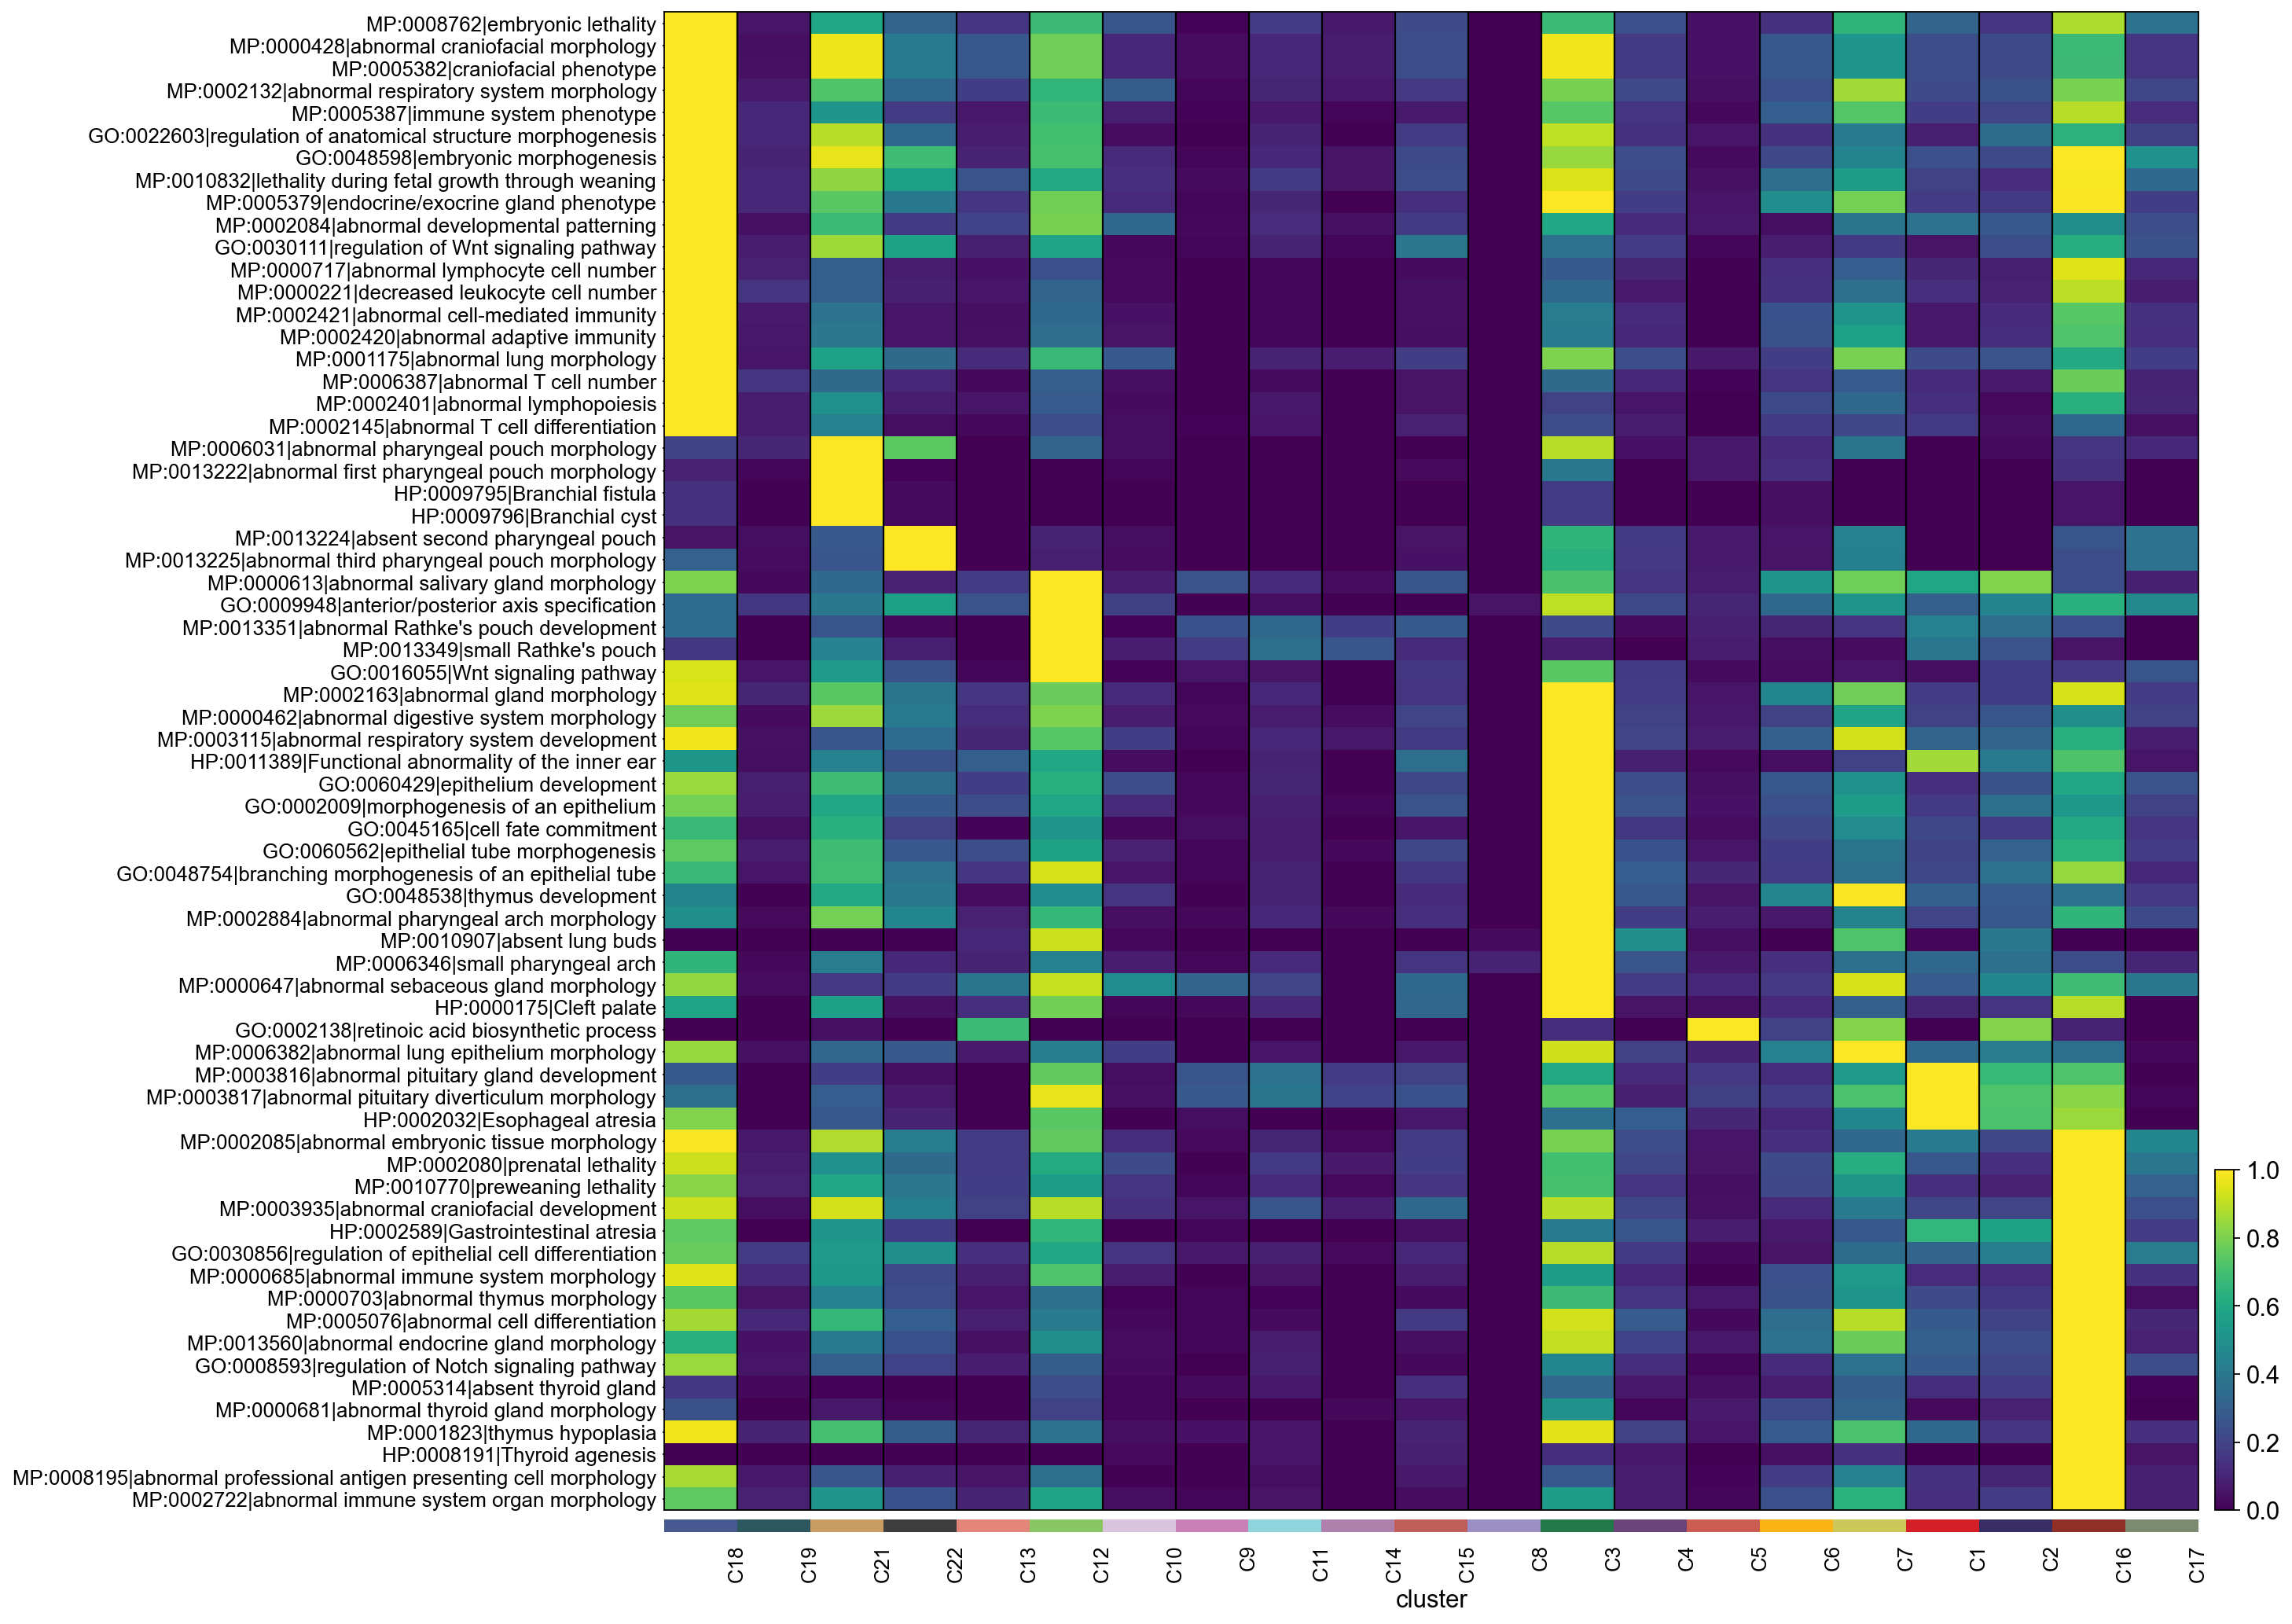

In [214]:
sc.pl.heatmap(adata_b,figsize=(16,16),standard_scale='var',dendrogram=False,swap_axes=True,var_names=adata_b.var.index,groupby='cluster',show_gene_labels=True,save='_distal_with_specific_chosen_great_terms.pdf')